<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sebastián Aguirre
- Nombre de alumno 2: Cristóbal Gallardo


### **Link de repositorio de GitHub:** `https://github.com/cristobalgallardo/MDS7202`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# UMAP
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 17.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=554f9d7ee8d7fb79eff2e818a3c8213cab020876af682e2e05d307d150cb665d
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=98e49322f76ac12cb08f30c3b66d0f3b47f95f84059ae87c7b3146ee670f49f3
  Stored in directory: /root/.cache/pip/wheels/7f/2a/

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Lab_MDS/Laboratorios/Lab7'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [3]:
df_players = pd.read_csv(path+ '/stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [4]:
df = df_players.copy()
# valores nulos son jugadores no seleccionados para representar a su país.
df['Classified'] = (~df['National_Position'].isna()).astype(int).astype("category")
# 0: no clasifica
# 1: clasifica

In [5]:
c1 = sum(df['Classified'])
c2 = len(df) - c1
print(f'Hay {c1} ({(100*c1)/len(df):.2f}%) que clasifican y {c2} ({(100*c2)/len(df):.2f}%) que no clasifican' ) 

Hay 1075 (6.11%) que clasifican y 16513 (93.89%) que no clasifican


Se observa que las clases estan desbalanceadas de manera significativa

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

In [6]:
# Se ignoran las columnas Nombre, Nacionalidad, National Position ya que las 2 primeras son irrelevantes (no son estadísticas en el juego) 
# y la 3ra son equivalentes a las labels. 
# Para columnas categoricas sin orden se usa OneHot Encoding ['Club_Position', 'Preffered_Foot']
col_categoricas = ['Club_Position', 'Preffered_Foot']
# Para columnas categoricas ordinales [Weak_foot, Skill_moves, Work_Rate] se transforma a ordinales (algunas ya están así)
# La variable Work_Rate son 2 variables ordinales en 1 así que se separan
df['Work_Rate1'] = df['Work_Rate'].apply(lambda x: x.split('/')[0].strip())
df['Work_Rate2'] = df['Work_Rate'].apply(lambda x: x.split('/')[1].strip())
df = df.drop('Work_Rate', axis = 1)
col_ordinales = ['Work_Rate1', 'Work_Rate2']
# Hay columnas numéricas que se observan normales en plots de distribución
col_normal = ['Height',
 'Weight',
 'Strength',
 'Acceleration',
 'Volleys',
 'Vision',
 'Jumping',
 'Composure',
 'Agility',
 'Aggression',
 'Speed',
 'Reactions',
 'Balance']
# Las demás parecen otras dsitribuciones (2 peaks, semi-planas, truncadas, etc) por lo que se aplica box-cox (son todas > 0)
col_box_cox = ['Age', 'Ball_Control','Dribbling','Marking','Sliding_Tackle','Standing_Tackle','Interceptions','Crossing', 'Short_Pass', 'Long_Pass', 'Stamina',
                       'Heading','Shot_Power','Finishing','Long_Shots','Curve','Freekick_Accuracy','Penalties']


In [7]:
col_tf = ColumnTransformer([
    ('One-hot', OneHotEncoder(handle_unknown='ignore'), col_categoricas),
    ('OrdinalEncoder', OrdinalEncoder(categories = [['Low', 'Medium', 'High'], ['Low', 'Medium', 'High']]), col_ordinales),
    ('StandardScaler', StandardScaler(), col_normal),
    ('Box-Cox', PowerTransformer('box-cox'), col_box_cox)
])

In [8]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# De acuerdo al diagrama se escoge una SVC (categoria, <100k)
SVC_pipe = Pipeline([
    ('preprocessing', col_tf),
    ('classifier', LinearSVC(max_iter=30000, random_state=69420, class_weight= 'balanced'))
])
# De acuerdo al diagrama si no funciona SVC se ocupa KN
KN_pipe = Pipeline([
    ('preprocessing', col_tf),
    ('classifier', KNeighborsClassifier())
])
# Si no funciona ocupar ensemble (RF)
RF_pipe = Pipeline([
    ('preprocessing', col_tf),
    ('classifier', RandomForestClassifier(random_state=69420, class_weight = 'balanced'))
])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [9]:
### Código aquí ###
droped_columns = ['Name', 'National_Position', 'Nationality']
X = df.drop(columns= droped_columns + ['Classified'])
y = df['Classified']
# Train test splic con estratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True, stratify=y) 

In [10]:
print('SVC Lineal')
svc = SVC_pipe.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred))
print('\n\n\n')


print('Random Forest')
rf = RF_pipe.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred))
print('\n\n\n')


print('K neighbours')
kn = KN_pipe.fit(X_train, y_train)
y_pred = kn.predict(X_test)
print(classification_report(y_test, y_pred))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred))

SVC Lineal
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      5505
           1       0.15      0.74      0.26       358

    accuracy                           0.74      5863
   macro avg       0.57      0.74      0.55      5863
weighted avg       0.93      0.74      0.80      5863

cohen_kappa_score: 0.1716247800392966




Random Forest
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5505
           1       0.52      0.04      0.07       358

    accuracy                           0.94      5863
   macro avg       0.73      0.52      0.52      5863
weighted avg       0.92      0.94      0.91      5863

cohen_kappa_score: 0.06471715067944694




K neighbours
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5505
           1       0.41      0.09      0.14       358

    accuracy                           0.94      5863
   ma

**Respuesta**:

Cómo se puede observar de los resultados ninguno de los clasificadores obtienen buenos resutlados en las métricas de acc, precision ni recall de la clase positiva. El que mejores resultados obtiene en sus métricas macro (Random Forest) tan sólo llega a un 52% de precisión lo que nos dice que solo 52 de cada 100 asignados como positivos lo son realmente, además se obtiene un recall de 9% es decir solo 9 de cada 100 positivos son clasificados correctanemente y se obtiene un accuracy de 94% lo cual contrasta con las métricas anteriores y deja en claro el desbalance entre la clase positiva y como se favorece la clase negativa al realizar la predicción.

También al determinar el kappa de Cohen, que es similar al accuracy pero ajustando el efecto que tiene el azar, se observa que los modelos que consideran el desbalance obtienen un mejor resultado.


Los resultados se podrían mejorar utilizando varias estrategias como: optimización de hiper-parámetros, validación cruzada, técnicas para combatir desbalance, algún tipo de aumentación de datos y/o recoletar más datos (en especial de la clase minoritaría).

El desbalance de clase afecta en gran medida al clasificador dado que tan solo 6.1% de los datos son de seleccionados, esto provoca que la clase minoritaria no obtenga tan buenos resultados, por lo mismo se ve que los clasificadores que intentan cosniderar este desbalance (SVC y RF) obtienen mejor resultado en la clase minoritaria.

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [11]:
df2 = df_players.copy()

In [12]:
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

In [13]:
labels = ['ataque','central_ataque','central','central_defensa','defensa','arquero']
cond = [df2['Club_Position'].isin(ataque),
              df2['Club_Position'].isin(central_ataque),
              df2['Club_Position'].isin(central),
              df2['Club_Position'].isin(central_defensa),
              df2['Club_Position'].isin(defensa),
              df2['Club_Position'].isin(arquero)]
df2['Club_Position'] = np.select(cond, labels, default = df2['Club_Position'] )
df2 = df2[df2['Club_Position'].isin(labels)]
df2['Club_Position'].value_counts()

defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: Club_Position, dtype: int64

In [14]:
px.histogram(x = df2['Club_Position'])

In [15]:
# Para columnas categoricas ordinales [Weak_foot, Skill_moves, Work_Rate] se transforma a ordinales (algunas ya están así)
# La variable Work_Rate son 2 variables ordinales en 1 así que se separan
df2['Work_Rate1'] = df2['Work_Rate'].apply(lambda x: x.split('/')[0].strip())
df2['Work_Rate2'] = df2['Work_Rate'].apply(lambda x: x.split('/')[1].strip())
df2 = df2.drop('Work_Rate', axis = 1)

In [16]:
col_tf2 = ColumnTransformer([
    ('One-hot', OneHotEncoder(handle_unknown='ignore'), ['Preffered_Foot']), # esto cambia
    ('OrdinalEncoder', OrdinalEncoder(categories = [['Low', 'Medium', 'High'], ['Low', 'Medium', 'High']]), col_ordinales),
    ('StandardScaler', StandardScaler(), col_normal),
    ('Box-Cox', PowerTransformer('box-cox'), col_box_cox)
])

# De acuerdo al diagrama se escoge una SVC (categoria, <100k)
SVC_pipe = Pipeline([
    ('preprocessing', col_tf2),
    ('classifier', LinearSVC(max_iter=10000, random_state=69420, class_weight= 'balanced'))
])

In [17]:
X = df2.drop(columns= droped_columns + ['Club_Position'])
y = df2['Club_Position']
# Train test splic sin estratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True) 

In [18]:
print('SVC Lineal')
svc = SVC_pipe.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred))
print('\n\n\n')

SVC Lineal
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       221
         ataque       0.70      0.92      0.79       147
        central       0.60      0.43      0.50       295
 central_ataque       0.53      0.42      0.47       202
central_defensa       0.39      0.46      0.42        72
        defensa       0.81      0.96      0.87       376

       accuracy                           0.73      1313
      macro avg       0.67      0.70      0.68      1313
   weighted avg       0.72      0.73      0.71      1313

cohen_kappa_score: 0.6619753752525495






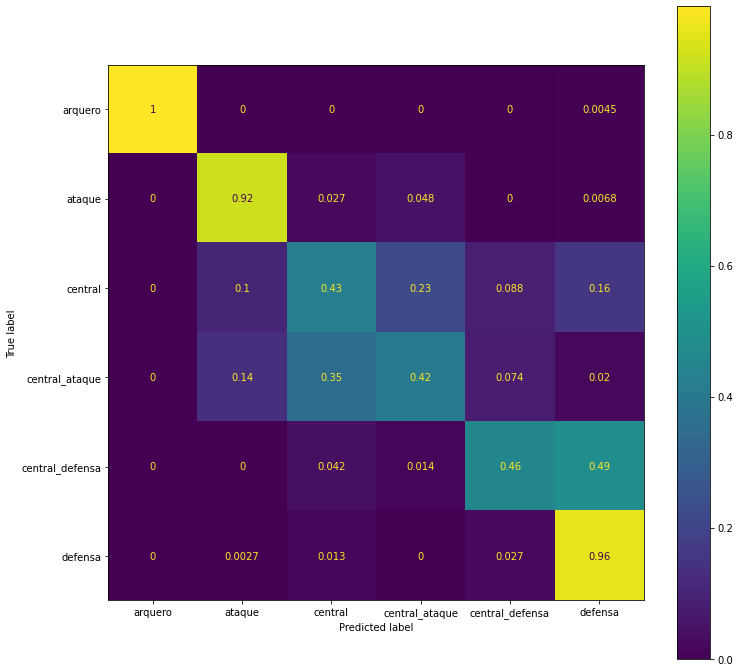

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, y_pred, labels=svc.classes_, normalize= 'true' )
fig, ax = plt.subplots(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

disp.plot(ax=ax)

**Respuesta**:

Se puede ver de los resultados que el clasificador detecta correctamente cuando un jugador es arquero sin confundirser, es decir de todas las detecciones de arquero, todos son arqueros y no detecta a otros jugadores como arqueros. 

Por otro lado, las clases defensa y ataque tienen el segundo y tercer lugar en accuracy respectivamente, y además tienen un recall similar (0.96 y 0.92 respectivamente), esto quiere decir que de todos los detectados como defensa y ataque, un 96% y 92% corresponden a defensas y ataques respectivamente. 

Finalmente, las clases que peor se desempeñan son Central, central ataque y central defensa respectivamente, esto puede deberse gracias a que sus roles son relativamente parecidos, lo que se ve reflejado en la matriz de confusión, donde el cantral y central ataque se confunden entre si y con el ataque, y por otro lado el central defensa que se confunde con el defensa. 

Una manera de mejorar los resultados podría ser buscando algun nuevo atributo que logre diferenciar a las clases que son parecidas, y lo otro, balancear las clases, ya que para el caso de central defensa y defensa la diferencia entre cantidad de ejemplos es significativa, lo que pudo llevar a que el clasificador confunda los central defensa por defensa.



## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

In [ ]:
salary = pd.read_csv(path +'/salarios.csv').drop(columns=['Unnamed: 0'])

In [ ]:
df_salary = df_players.merge(salary, left_on='Name', right_on='Player')

In [ ]:
# Agregar variable Clasificado Nacional
df_salary['Classified'] = (~df_salary['National_Position'].isna()).astype(int).astype("category")

In [ ]:
df_salary['Work_Rate1'] = df_salary['Work_Rate'].apply(lambda x: x.split('/')[0].strip())
df_salary['Work_Rate2'] = df_salary['Work_Rate'].apply(lambda x: x.split('/')[1].strip())
df_salary = df_salary.drop('Work_Rate', axis = 1)

In [ ]:
# Correlación con variable de salida
corr_matrix = df_salary.corr(method='spearman')
px.bar(corr_matrix['Weekly Salary'])

In [ ]:
# Quitar ['Height', 'Weight'] de features
col_normal_2 = [item for item in col_normal if item not in ['Height', 'Weight']]

In [ ]:
# One hot pasa ser dummy variable
col_tf3 = ColumnTransformer([
    ('One-hot', OneHotEncoder(handle_unknown='ignore', sparse = False, drop = 'first'), ['Classified', 'Nationality'] + col_categoricas), # esto cambia
    ('OrdinalEncoder', OrdinalEncoder(categories = [['Low', 'Medium', 'High'], ['Low', 'Medium', 'High']]), col_ordinales),
    ('StandardScaler', StandardScaler(), col_normal_2),
    ('Box-Cox', PowerTransformer('box-cox'), col_box_cox)
])


In [ ]:
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.svm import SVR

# Probar si pocos regresores son importantes (Ridge y Lasso)
Elastic_pipe = Pipeline([
    ('preprocessing', col_tf3),
    ('regressor', ElasticNet(random_state=69420))
])

Ridge_pipe = Pipeline([
    ('preprocessing', col_tf3),
    ('regressor', Ridge())
])

# Probar si mejora resultado ocupando más regresores
SVR_pipe = Pipeline([
    ('preprocessing', col_tf3),
    ('regressor', SVR(kernel='rbf'))
])


param_Ridge = {"regressor__alpha": [0.1, 10.0, 100.0]}

param_Elastic = {
    "regressor__alpha": [0.1, 10.0, 100.0],
    "regressor__l1_ratio": [0.2, 0.5, 0.8],
}

param_SVR = {
    "regressor__C": [1.0,2.0,3.0],
    "regressor__gamma": ['scale', 'auto'],
}

target_trans = FunctionTransformer(np.log1p, inverse_func = np.expm1
                                   ,validate=True, check_inverse = True)

target_pipeline =  Pipeline([
    ('preprocessing', target_trans)])

pipes = [Elastic_pipe, Ridge_pipe, SVR_pipe]
param_grids = [param_Elastic, param_Ridge, param_SVR]

In [ ]:
# Columnas que no se ocupan
droped_columns_salary = ['Name', 'National_Position'] 

Buscar parámetros con CV

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

R2 = []
# Probar para distintas particiones de train-test
for random_s in [11, 420, 69420]:
  # Procesar datos
  X = df_salary.drop(columns= droped_columns_salary + ['Weekly Salary'])
  y = df_salary['Weekly Salary'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True, random_state = random_s)
  
  # Remplazar cosas poco frecuentes en train por label 'infrequent' y ocupar solo etiquetas frecuentes en test
  # Con sklearn 1.1 esto se peude hacer en pipeline en OneHotEncoding(handle_unknown = ‘infrequent_if_exist’, min_frequency = 15)
  counts = X_train['Nationality'].value_counts() 
  frequent = counts[counts >= 15].index
  X_train.loc[~X_train['Nationality'].isin(frequent), 'Nationality'] = 'Infrequent'
  X_test.loc[~X_test['Nationality'].isin(frequent), 'Nationality'] = 'Infrequent'

  # Probar cada pipeline con GridSearchCV y guardar resultado
  r2s = []
  # Preprocesar salida
  y_train = target_pipeline.transform(y_train.reshape(-1, 1)).reshape(-1)
  for pipe, param_grid in zip(pipes, param_grids): 
    # Realizar CV en a cada pipeline
    search = GridSearchCV(pipe, param_grid, cv = 3, n_jobs=-1)
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    # Revertir transformación de salida
    y_pred = target_pipeline.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
    r2 = r2_score(y_test, y_pred)
    print(pipe['regressor'], f': R2 = {r2}')
    r2s.append(r2)
  
  # Guardar resultados de todos los experimentos
  R2.append(r2s)

# Calcular promedio de R2 en experimentos
R2 = np.array(R2)
print('\n\n')
print('Promedios R2')
print('Elastic:',R2[:, 0].mean())
print('Ridge:',R2[:, 1].mean())
print('SVR:',R2[:, 2].mean())

ElasticNet(random_state=69420) : R2 = 0.36891149684985014
Ridge() : R2 = 0.5465618544798388
SVR() : R2 = 0.6414643368400728
ElasticNet(random_state=69420) : R2 = 0.2619620624131076
Ridge() : R2 = 0.38976214396492825
SVR() : R2 = 0.5752064263860247
ElasticNet(random_state=69420) : R2 = 0.31159213295683763
Ridge() : R2 = 0.46490151807761493
SVR() : R2 = 0.5819588813420387



Promedios R2
Elastic: 0.3141552307399318
Ridge: 0.4670751721741273
SVR: 0.5995432148560454


In [ ]:
search.best_estimator_['regressor']

SVR(gamma='auto')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True, random_state = 0)
# Remplazar cosas poco frecuentes en train por label 'infrequent' y ocupar solo etiquetas frecuentes en test
# Con sklearn 1.1 esto se peude hacer en pipeline en OneHotEncoding(handle_unknown = ‘infrequent_if_exist’, min_frequency = 15)
counts = X_train['Nationality'].value_counts() 
frequent = counts[counts >= 15].index
X_train.loc[~X_train['Nationality'].isin(frequent), 'Nationality'] = 'Infrequent'
X_test.loc[~X_test['Nationality'].isin(frequent), 'Nationality'] = 'Infrequent'

SVR_pipe_final = Pipeline([
    ('preprocessing', col_tf3),
    ('regressor', SVR(gamma='auto'))
])

y_train = target_pipeline.transform(y_train.reshape(-1, 1)).reshape(-1)
results = SVR_pipe_final.fit(X_train, y_train)
y_pred = results.predict(X_test)
y_pred = target_pipeline.inverse_transform(y_pred.reshape(-1, 1))
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

R2: 0.6136754685988983


In [ ]:
px.scatter(x = y_test, y = [y_pred.reshape(-1), y_test])

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

Con SVR se obtienen resultados aceptables con un R2 de alrededor de 0.6 en los experimentos, esto quiere decir que más de la mitad de la varianza del sueldo es explicada por las características usadas para su predicción.

Para mejorar los resultados consideramos que se requiriere una mezcla de ambas cosas, más datos y más características. Hay características que son fáciles de obtener y que puden estar muy correlacionadas con los sueldos por ejemplo: la liga en la que más se juega, la cantidad de partidos jugados en ligas importantes, el equipo en que juegan, la cantidad de seguidores del jugador en redes sociales, etc. Pero además observamos que existen muchas clases y nacionalidades que estan poco representadas lo cual podría empeorar la capacidad de generalización a estos casos.

Además se podrían reducir las características que ya se tienen por ejemplo en nuestro caso desechamos las variables de altura y peso ya que no tienen mucha relación con el sueldo. 

Finalmente se pueden aplicar técnicas típicas para mejorar el modelo como: probar más hiper-parámetros, realizar validación cruzada con más folds, probar con preprocesamientos distintos para las características de entrada y probar procesamientos a la variable de sueldos.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>